In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
## read the dataset
df = pd.read_csv('income_evaluation.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
## check null values in dataset

df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [5]:
df.shape

(32561, 15)

In [7]:
df.columns=['age','workclass','final_weight','education','education_num','marital_status','occupation','relationship','race','sex',
            'capital_gain','capital_loss','hrs_per_week','native_country','income']

In [8]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
## converting income columns to 0's and 1's {0 for salary <=50K and 1 for salary >50K}
df['income'] = [1 if value == ' >50K' else 0 for value in df['income'].values]

In [11]:
## Last 5 rows in dataset
df.tail()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [12]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
## removing ? from column workclass
df['workclass'] = np.where(df.workclass == '?',np.nan, df['workclass'])

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
workclass_label = {v:k for k,v in enumerate(df.workclass.unique())}

In [16]:
workclass_label

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' ?': 5,
 ' Self-emp-inc': 6,
 ' Without-pay': 7,
 ' Never-worked': 8}

In [17]:
df.workclass = df.workclass.map(workclass_label)

In [18]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [19]:
education_label = {v:k for k,v in enumerate(df.education.unique())}

In [21]:
education_label

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' 1st-4th': 13,
 ' Preschool': 14,
 ' 12th': 15}

In [22]:
df.education = df.education.map(education_label)

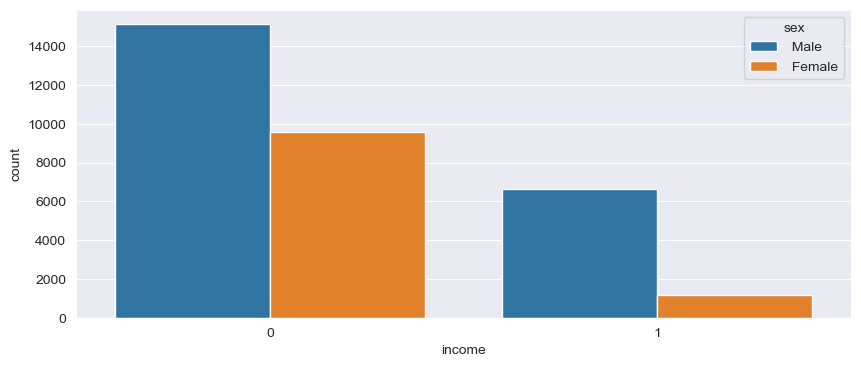

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(x='income',data=df, hue='sex');

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

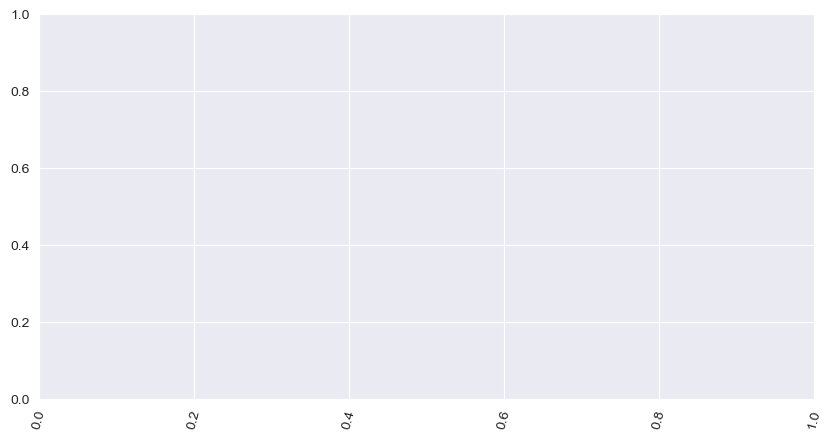

In [29]:
native_country = df.native_country.value_counts().nlargest(5)

plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(native_country.index,np.log(native_country));

In [30]:
df.native_country = np.where(df.native_country == ' ?',np.nan, df['native_country'])

In [31]:
df.dropna(axis=0, inplace=True)

In [32]:
native_country = {v:k for k,v in enumerate(df.native_country.unique())}

In [33]:
df.native_country = df.native_country.map(native_country)

In [34]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,0
1,50,1,83311,0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,0
2,38,2,215646,1,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,0
3,53,2,234721,2,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,0
4,28,2,338409,0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,1,0


In [35]:
df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [36]:
marital_label = {v:k for k,v in enumerate(df.marital_status.unique())}

In [37]:
df.marital_status = df.marital_status.map(marital_label)

In [38]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [39]:
df.occupation = np.where(df.occupation == ' ?',np.nan,df['occupation'])

In [40]:
df.dropna(axis=0, inplace=True)

In [41]:
occ_label = {v:k for k,v in enumerate(df.occupation.unique())}

In [42]:
df.occupation = df.occupation.map(occ_label)

In [44]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [45]:
relationship_label = {v:k for k,v in enumerate(df.relationship.unique())}

In [46]:
df.relationship = df.relationship.map(relationship_label)

In [47]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,White,Male,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,White,Male,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,White,Male,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,Black,Male,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,Black,Female,0,0,40,1,0


In [48]:
df.sex = np.where(df.sex == 'Male',1,0)

In [49]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [50]:
race_label = {v:k for k,v in enumerate(df.race.unique())}

In [51]:
race_label

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [52]:
df.race = df.race.map(race_label)

In [53]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1,0


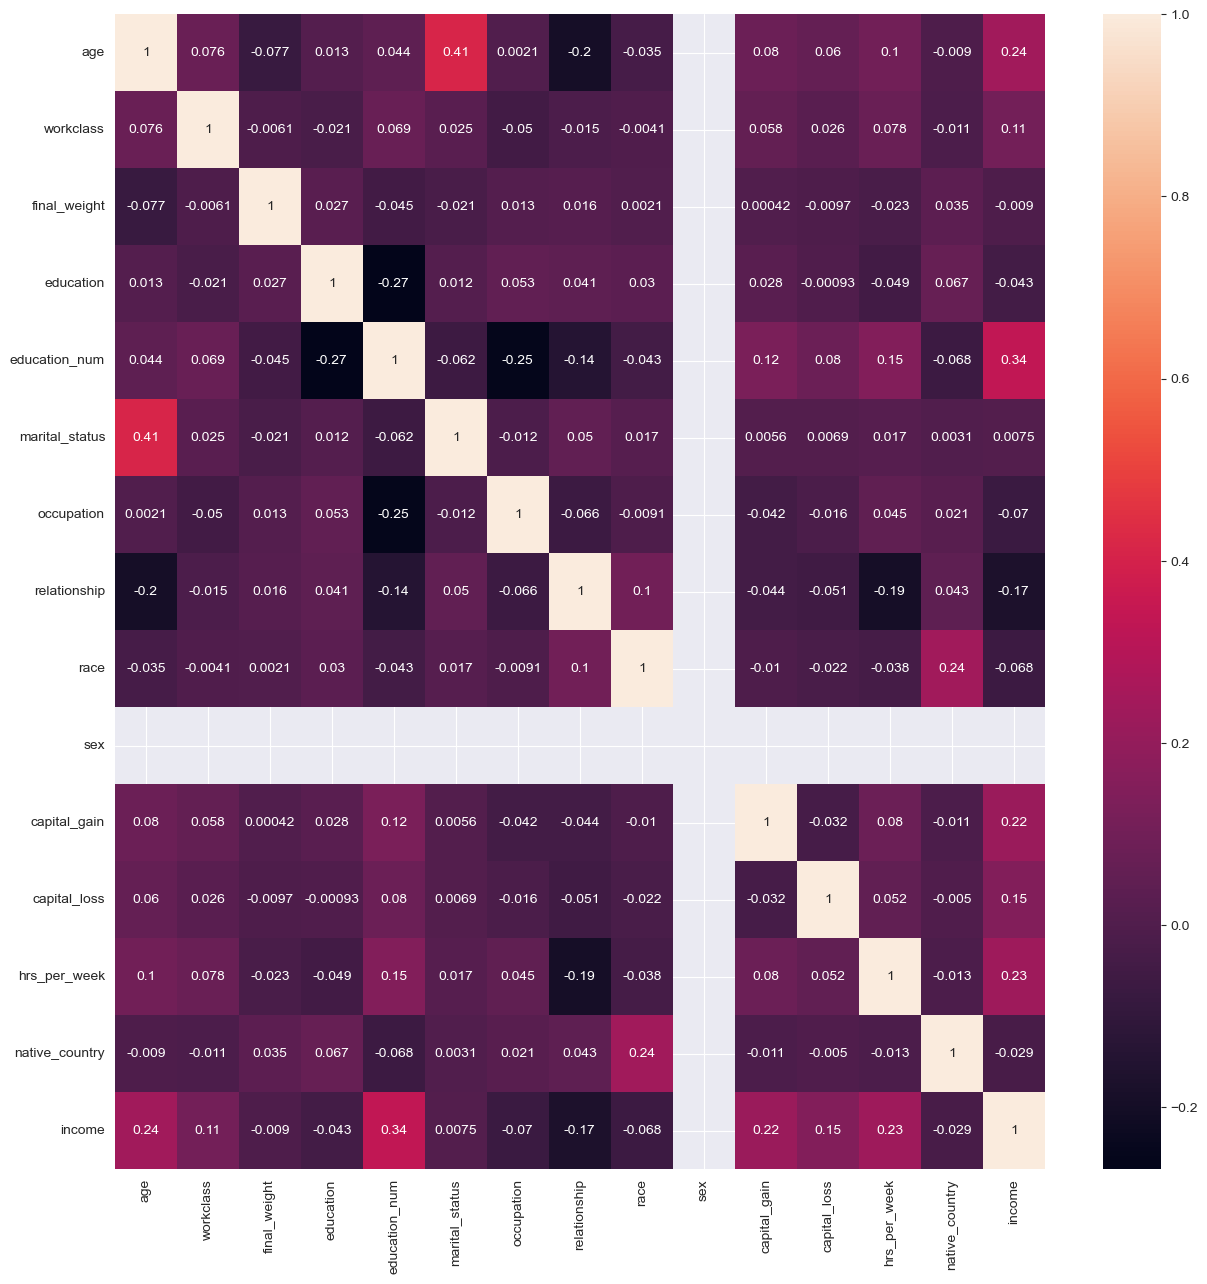

In [54]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);

In [55]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1,0


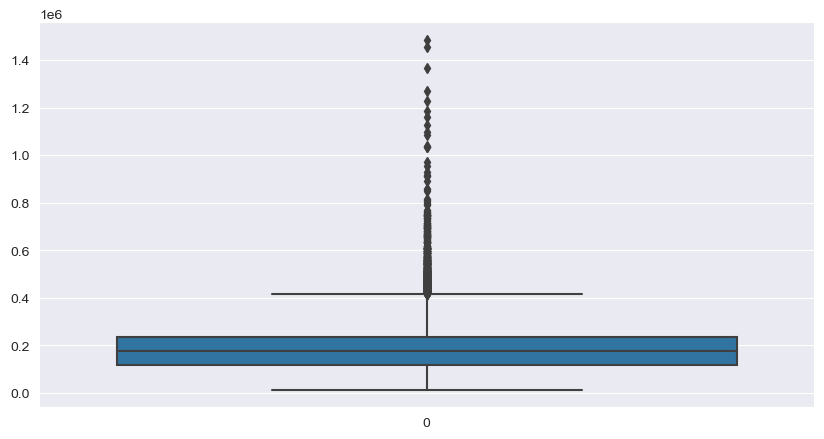

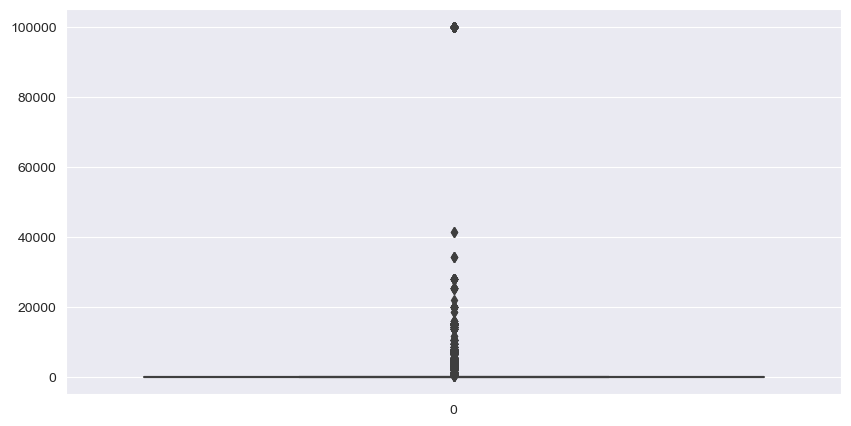

In [56]:
for feature in ['final_weight','capital_gain']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[feature])

In [57]:
df.describe()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
count,30162.000000,30162.000000,3.016200e+04,30162.00000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.0,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.145415,1.897938e+05,3.37282,10.121312,1.075061,4.615609,1.523971,0.211823,0.0,1092.007858,88.372489,40.931238,1.166733,0.248922
std,13.134665,1.057390,1.056530e+05,3.41833,2.549995,1.217557,3.432195,1.431980,0.612461,0.0,7406.346497,404.298370,11.979984,4.881543,0.432396
min,17.000000,0.000000,1.376900e+04,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,1.00000,9.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,2.00000,10.000000,1.000000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.00000,13.000000,1.000000,8.000000,3.000000,0.000000,0.0,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,0.0,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [60]:
X = X.values
y = y.values

sc = StandardScaler()
sc.fit_transform(X)

array([[ 0.04279571, -2.02900591, -1.0627216 , ..., -0.21858598,
        -0.07773411, -0.239013  ],
       [ 0.88028814, -1.08326528, -1.00787131, ..., -0.21858598,
        -2.3315307 , -0.239013  ],
       [-0.03333996, -0.13752465,  0.24469349, ..., -0.21858598,
        -0.07773411, -0.239013  ],
       ...,
       [ 1.48937355, -0.13752465, -0.3585745 , ..., -0.21858598,
        -0.07773411, -0.239013  ],
       [-1.25151078, -0.13752465,  0.11070545, ..., -0.21858598,
        -1.74721307, -0.239013  ],
       [ 1.0325595 ,  3.64543788,  0.92884082, ..., -0.21858598,
        -0.07773411, -0.239013  ]])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lg = LogisticRegression()

In [64]:
lg.fit(X_train, y_train)

LogisticRegression()

In [65]:
pred = lg.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

--------------------------------------Classification Report-------------------------------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6767
           1       0.71      0.25      0.37      2282

    accuracy                           0.79      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.79      0.74      9049

--------------------------------------Accuracy Score--------------------------------------
0.785390650900652
--------------------------------------Confusion Matrix------------------------------------


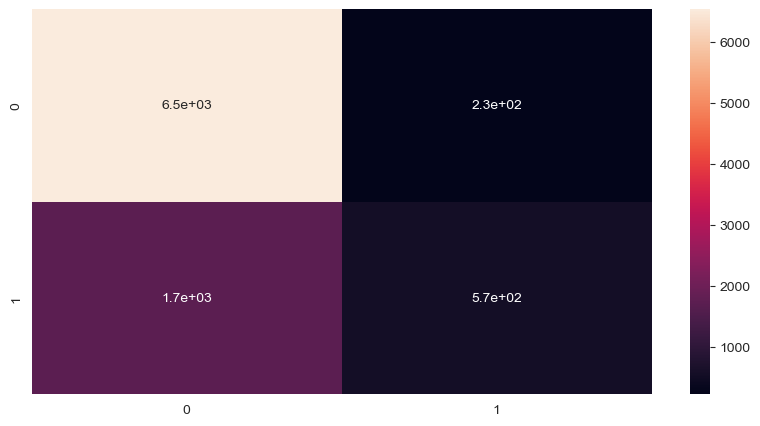

In [67]:
print("--------------------------------------Classification Report-------------------------------")
print(classification_report(y_test, pred))

print("--------------------------------------Accuracy Score--------------------------------------")
print(accuracy_score(y_test, pred))

print("--------------------------------------Confusion Matrix------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);
